In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_wine

# **Load Dataset**

In [23]:
wine_data = load_wine()
wine_data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [15]:
data = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
data['target'] = pd.Series(wine_data.target)

In [18]:
data['target'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

# **Data Exploration**

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [25]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


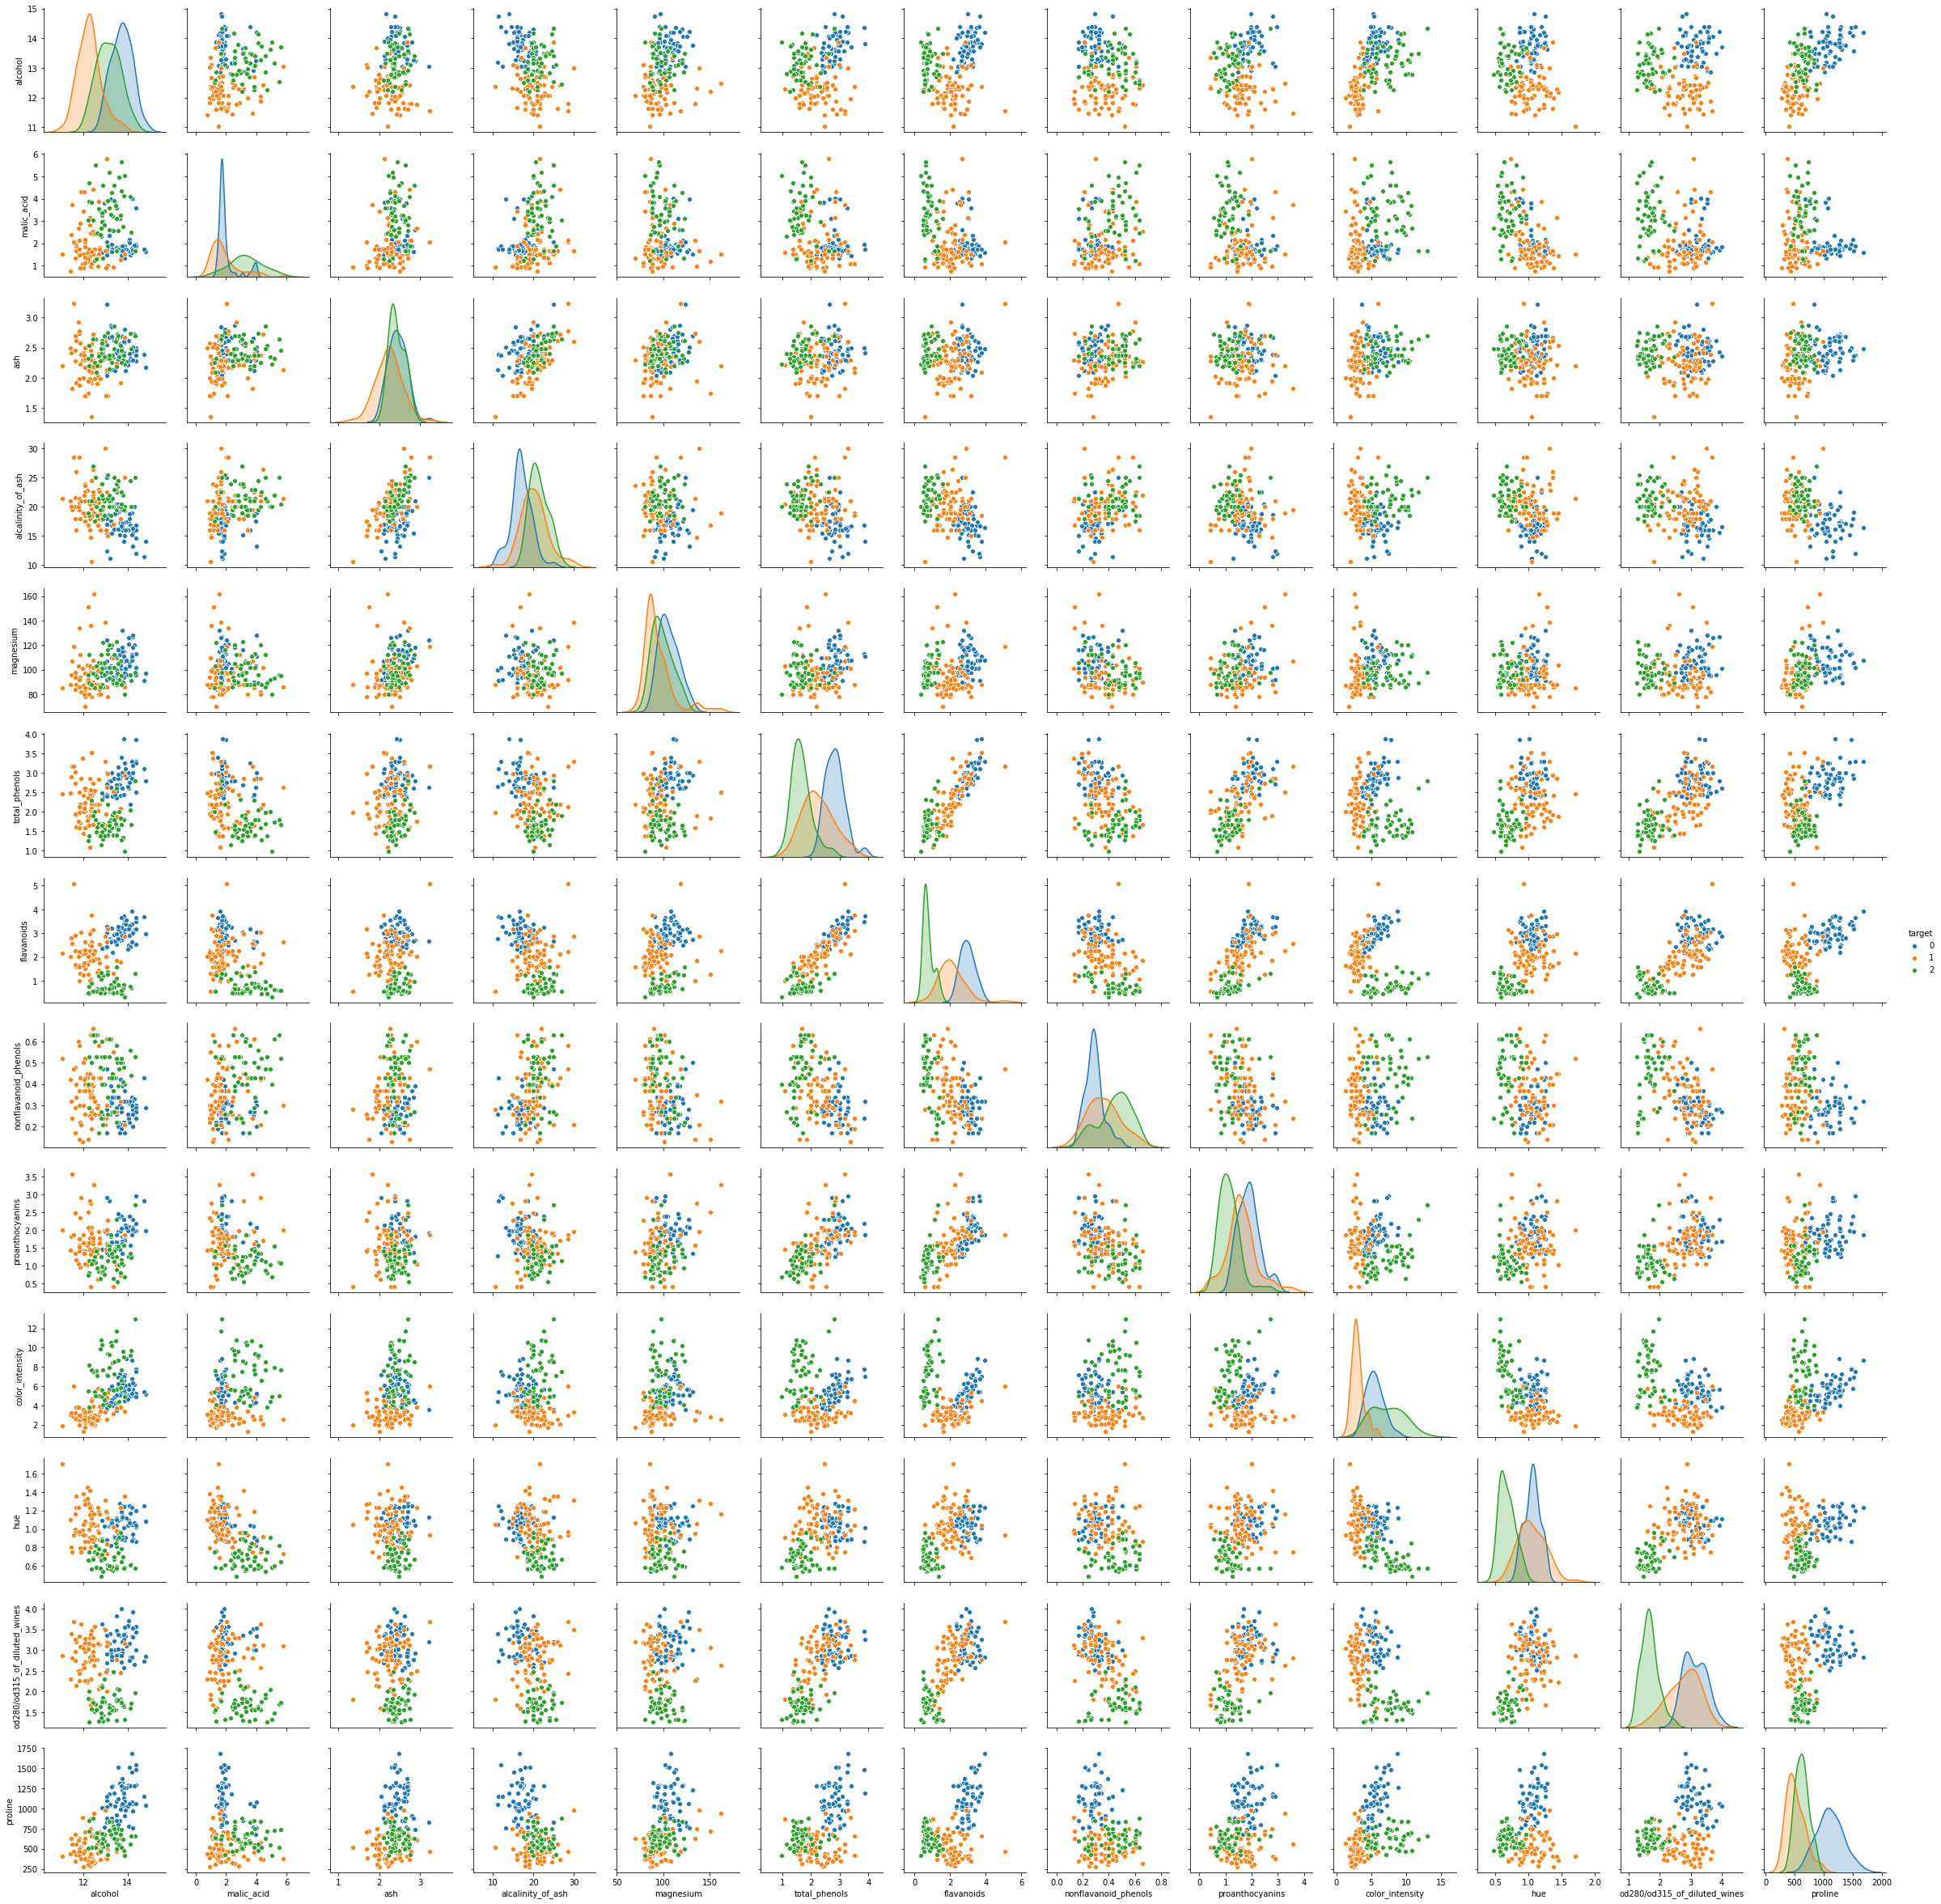

In [26]:
sns.pairplot(data, hue='target')

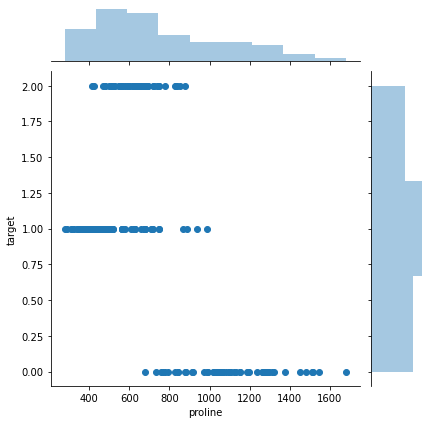

In [27]:
sns.jointplot(x=data['proline'], y=data['target'], data=data)

# **Preparing the Data**

In [28]:
data.info

<bound method DataFrame.info of      alcohol  malic_acid   ash  ...  od280/od315_of_diluted_wines  proline  target
0      14.23        1.71  2.43  ...                          3.92   1065.0       0
1      13.20        1.78  2.14  ...                          3.40   1050.0       0
2      13.16        2.36  2.67  ...                          3.17   1185.0       0
3      14.37        1.95  2.50  ...                          3.45   1480.0       0
4      13.24        2.59  2.87  ...                          2.93    735.0       0
..       ...         ...   ...  ...                           ...      ...     ...
173    13.71        5.65  2.45  ...                          1.74    740.0       2
174    13.40        3.91  2.48  ...                          1.56    750.0       2
175    13.27        4.28  2.26  ...                          1.56    835.0       2
176    13.17        2.59  2.37  ...                          1.62    840.0       2
177    14.13        4.10  2.74  ...                    

In [30]:
from sklearn.model_selection import train_test_split

In [41]:
X = data.drop(columns=['target'])
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# **Building the Model**

In [42]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

In [43]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
# Predictions:

pred = model.predict(X_test)

In [45]:
# Metrics:

from sklearn.metrics import classification_report, confusion_matrix

In [46]:
print('Classification Report: \n', classification_report(y_test, pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.93      0.96        27
           2       0.93      1.00      0.96        13

    accuracy                           0.96        54
   macro avg       0.95      0.98      0.96        54
weighted avg       0.97      0.96      0.96        54



In [47]:
print('Confusion Matrix: \n', confusion_matrix(y_test, pred))

Confusion Matrix: 
 [[14  0  0]
 [ 1 25  1]
 [ 0  0 13]]


# **Grid Search**

In [48]:
from sklearn.model_selection import GridSearchCV

In [51]:
# Parameters for Grid Search:

param_grid = {'n_estimators': np.arange(100, 200, 1), 'criterion': ['gini', 'entropy']}

In [55]:
model_grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, refit=True)

In [56]:
model_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=No...
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 14

In [59]:
model_grid.best_params_

{'criterion': 'gini', 'n_estimators': 103}

In [60]:
# Predictions Grid:

pred_grid = model_grid.predict(X_test)

In [61]:
print('Classification Report - Grid Search: \n', classification_report(y_test, pred))

Classification Report - Grid Search: 
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.93      0.96        27
           2       0.93      1.00      0.96        13

    accuracy                           0.96        54
   macro avg       0.95      0.98      0.96        54
weighted avg       0.97      0.96      0.96        54



In [62]:
print('Confusion Matrix - Grid Search: \n', confusion_matrix(y_test, pred))

Confusion Matrix - Grid Search: 
 [[14  0  0]
 [ 1 25  1]
 [ 0  0 13]]
